In [1]:
# default_exp utils.plot

In [2]:
#export
from capetools.imports import *
from capetools.utils.pandas_hacks import *

# Plotting and Visualizing
> Some handy ways of plotting timeseries data

In [3]:
DATAPATH = Path.cwd().parent/'data'
DATAPATH.ls()

(#1) [Path('/home/tc256760/Documents/lspv_dataAnalytics/data/sample_data.hdf')]

In [4]:
df = pd.read_hdf(DATAPATH/'sample_data.hdf')
df.head()

,temp_air,wind_speed,wind_dir,ghi,dni,dhi,ghi30,ref_cell_30,pressure,humidity
Date UTC,,,,,,,,,,
2019-01-01 00:00:00,4.39,1.87,230.1,-0.83,0.0,-0.83,-1.17,0.0,1004.92,86.8
2019-01-01 01:00:00,4.33,2.87,228.9,-0.93,0.0,-0.83,-1.06,0.0,1004.94,86.8
2019-01-01 02:00:00,4.29,2.86,229.4,-0.83,0.0,-0.83,-1.17,0.0,1004.68,86.7
2019-01-01 03:00:00,4.15,2.04,186.0,-0.83,0.0,-0.83,-1.06,0.0,1003.99,85.7
2019-01-01 04:00:00,3.85,1.91,200.9,-0.72,0.0,-0.83,-0.85,0.0,1003.76,87.5


In [5]:
#export
@delegates(plt.subplots)
def plot2series(s1: Series, s2: Series, names:Optional[str]=None, y_label='y', **kwargs):
    "Plots 2 Series against each other"
    fig, ax = plt.subplots(**kwargs)
    pd.concat([s1, s2], axis=1).plot(ax=ax)
    names = ifnone(names, [s1.name, s2.name])
    ax.legend(names)
    ax.set_ylabel(y_label)
    return ax

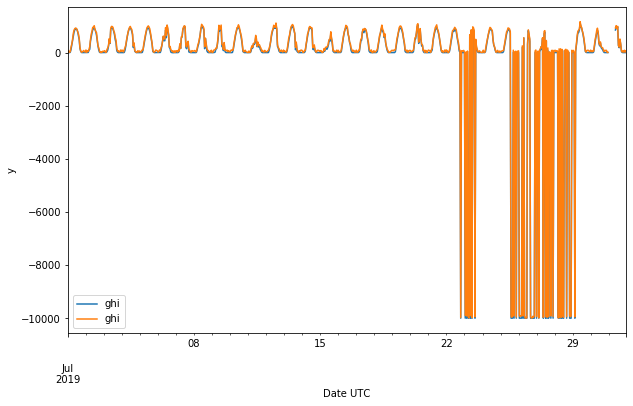

In [6]:
s1 = df.ghi['Jul 2019']
s2 = s1+100*np.random.uniform(size=s1.shape)
ax = plot2series(s1, s2, figsize=(10,6))

In [7]:
#export
def add_value_labels(ax, labels=None, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """
    
    # For each bar: Place a label
    labels = ifnone(labels, [None]*len(ax.patches))
    for rect, label in zip(ax.patches, labels):
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(ifnone(label, y_value))

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
    return

In [10]:
#export
def plot_yearly_gain(s1: Series, s2: Series, resample='monthly'):
    "Plot gain"
    if resample=='monthly':
        s1 = monthly(s1)/1000
        s2 = monthly(s2)/1000
    _, ax = plt.subplots(figsize=(12,5))
    (pd.concat([s1, s2], axis=1,sort=False)
    .plot.bar(ax=ax, stacked=True, color=['blue', 'violet']))
    ax.set_title('Gain')
    gain = 100*(s2/s1)
    add_value_labels(ax, gain, spacing=5)
    return

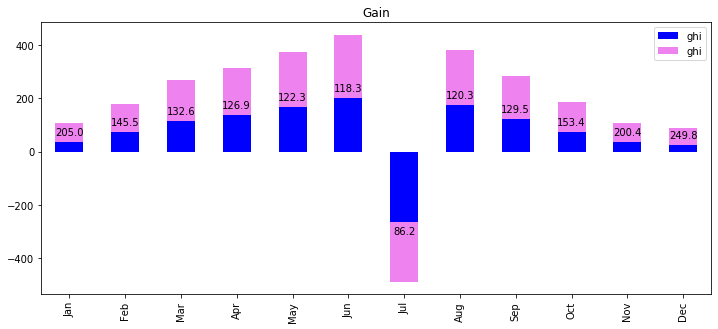

In [11]:
s1 = df.ghi
s2 = s1+100*np.random.uniform(size=s1.shape)
plot_yearly_gain(s1, s2)

# Exports -

In [12]:
#hide
from nbdev.export import notebook2script
notebook2script()

Converted 00_utils.core.ipynb.
Converted 01_utils.pandas_hacks.ipynb.
Converted 03_utils.matlab_io.ipynb.
Converted 04_utils.missing.ipynb.
Converted 05_utils.plot.ipynb.
Converted index.ipynb.
